Task 1: Data dimensionality, distance-based classifiers

1. Center of Cloud Algorithm

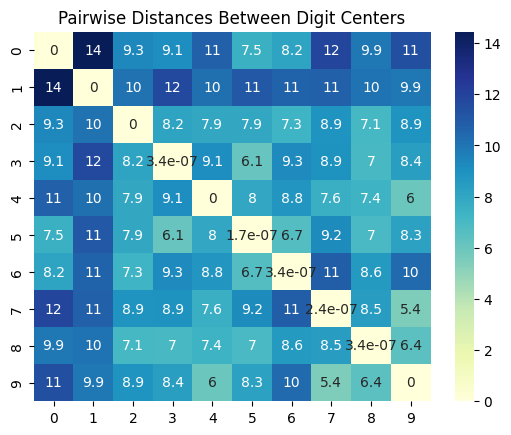

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.metrics import pairwise_distances
import random

random.seed(123)


# Training Data
train_in = pd.read_csv('train_in.csv', header=None)
train_out = pd.read_csv('train_out.csv', header=None)

centers = []

# Computation Center for Each digit's Cloud of points
for digit in range(10):
    digit_data = train_in[train_out[0] == digit]
    center = digit_data.mean(axis=0)
    centers.append(center)


# Pairwise_Distances Function
distances = pairwise_distances(centers)

# Heatmap
sns.heatmap(distances, annot=True, cmap='YlGnBu')
plt.title("Pairwise Distances Between Digit Centers")
plt.show()

2. PCA, t-SNE, U-MAP

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1707 samples in 0.025s...
[t-SNE] Computed neighbors for 1707 samples in 0.902s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1707
[t-SNE] Computed conditional probabilities for sample 1707 / 1707
[t-SNE] Mean sigma: 2.700914
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.153076
[t-SNE] KL divergence after 300 iterations: 1.494527


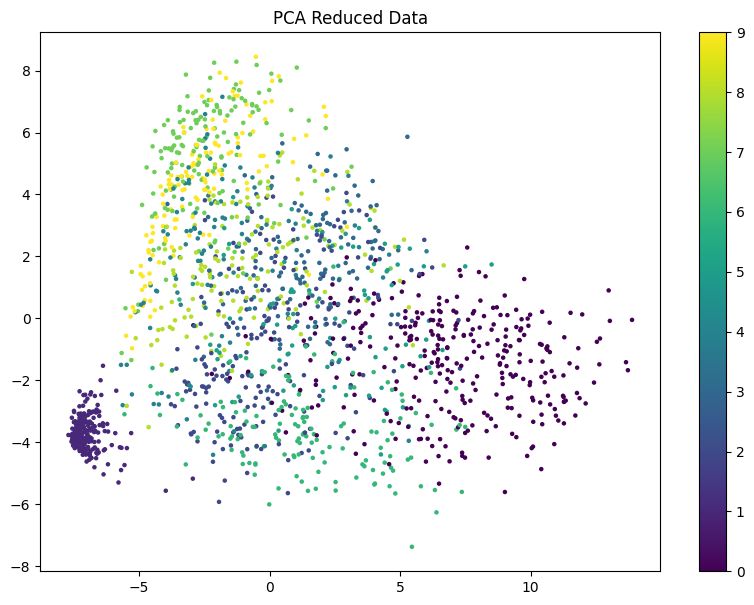

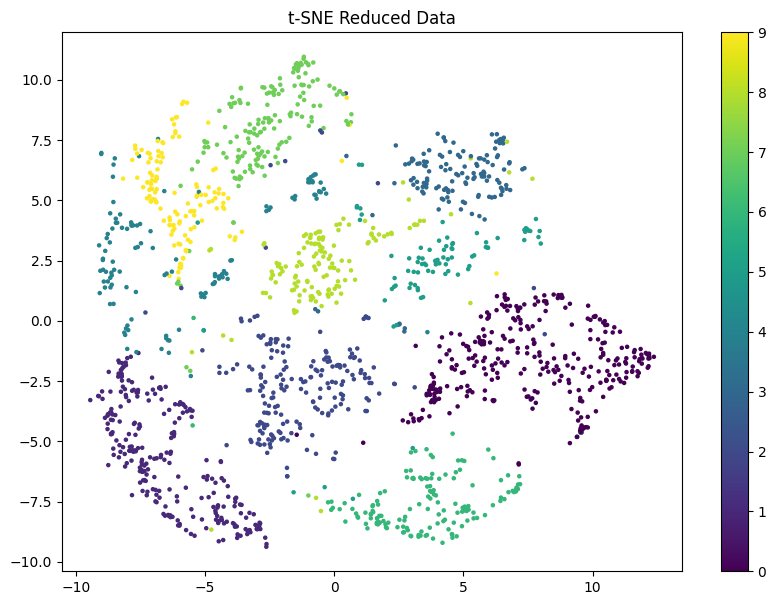

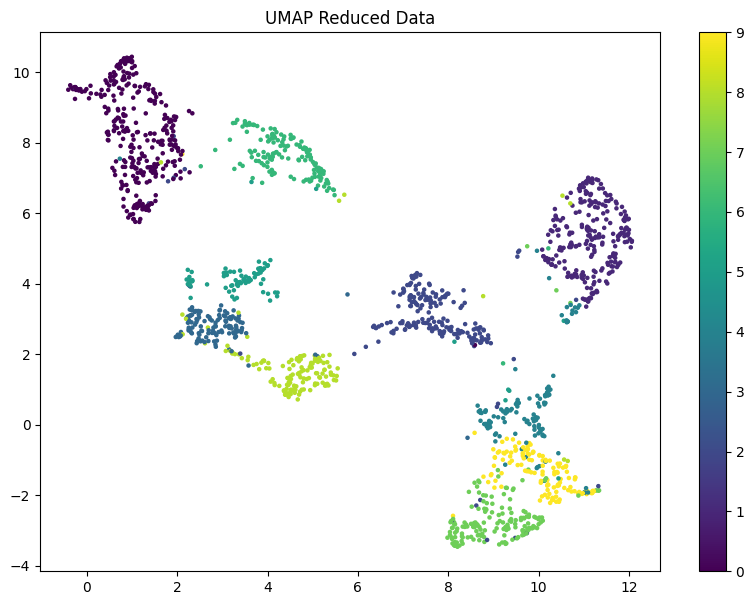

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_in)

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(train_in)

# U-MAP
reducer = umap.UMAP()
umap_result = reducer.fit_transform(train_in)

# Scattterplots
def plot_scatter(data, title, labels):
    plt.figure(figsize=(10,7))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Visualize the results from all techniques
plot_scatter(pca_result, 'PCA Reduced Data', train_out[0])
plot_scatter(tsne_result, 't-SNE Reduced Data', train_out[0])
plot_scatter(umap_result, 'UMAP Reduced Data', train_out[0])


3. Nearest mean classifier

In [34]:
import numpy as np
import pandas as pd

# Load Training Data
train_in = pd.read_csv('train_in.csv', header=None)
train_out = pd.read_csv('train_out.csv', header=None)

# Load Test Data
test_in = pd.read_csv('test_in.csv', header=None)
test_out = pd.read_csv('test_out.csv', header=None)

# Calculate centers (mean vectors) for each digit
centers = [train_in[train_out[0] == digit].mean(axis=0) for digit in range(10)]

def nearest_mean_classifier(data_point, centers):
    """Return the label of the nearest center."""
    distances = [euclidean(data_point, center) for center in centers]
    return np.argmin(distances)

# Apply Classifier on Training Data
train_predictions = train_in.apply(nearest_mean_classifier, axis=1, centers=centers)
train_accuracy = np.mean(train_predictions == train_out[0])
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Apply Classifier on Test Data
test_predictions = test_in.apply(nearest_mean_classifier, axis=1, centers=centers)
test_accuracy = np.mean(test_predictions == test_out[0])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 86.35%
Test Accuracy: 80.40%


4. KNN

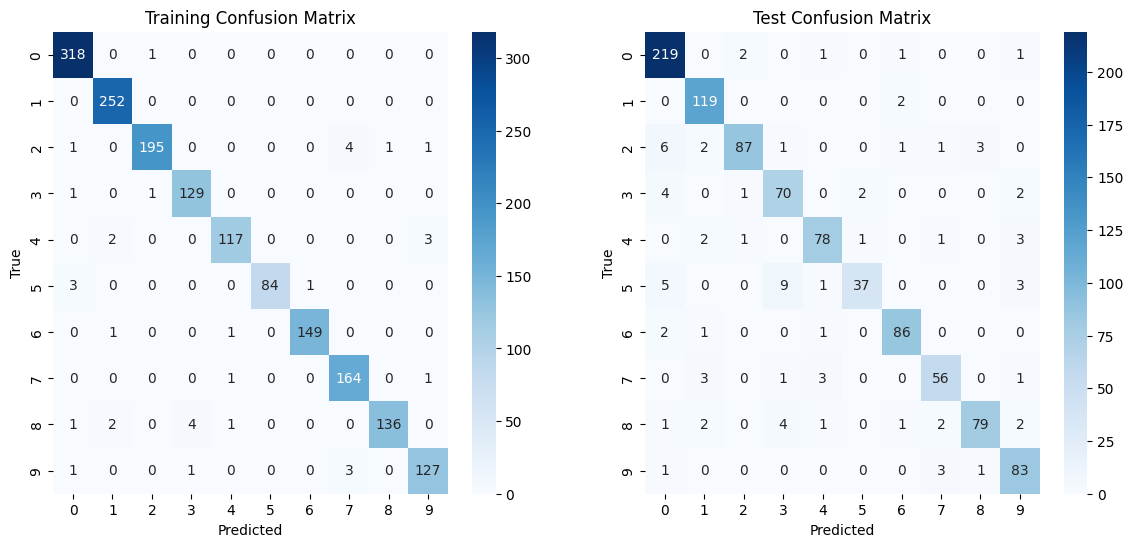

Training accuracy for KNN: 97.89%
Test accuracy for KNN: 91.40%


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
train_in = pd.read_csv('train_in.csv', header=None)
train_out = pd.read_csv('train_out.csv', header=None)
test_in = pd.read_csv('test_in.csv', header=None)
test_out = pd.read_csv('test_out.csv', header=None)

# 1. Implement the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors as an example
knn.fit(train_in, train_out.values.ravel())  # .ravel() is used to get the right shape for labels

# 2. Predict
train_preds = knn.predict(train_in)
test_preds = knn.predict(test_in)

# 3. Generating and Visualizing Confusion Matrices
train_cm = confusion_matrix(train_out, train_preds)
test_cm = confusion_matrix(test_out, test_preds)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(train_cm, annot=True, fmt="d", ax=ax[0], cmap="Blues")
ax[0].set_title("Training Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(test_cm, annot=True, fmt="d", ax=ax[1], cmap="Blues")
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.show()

# 4. Comparing Performance
acc_knn_train = accuracy_score(train_out, train_preds)
acc_knn_test = accuracy_score(test_out, test_preds)

print(f"Training accuracy for KNN: {acc_knn_train:.2%}")
print(f"Test accuracy for KNN: {acc_knn_test:.2%}")
